# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the *synth1* data into python using the *loadmat* function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided *clusterPlot()* function.
 + *In Python, you can use the function KMeans() from the package sklearn.cluster to compute *k*-means clustering. please read the documentation of the function, as it creates an object which you can then use for clustering.*
 + *Type clusterPlot(X,clusters,centroids,y) to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


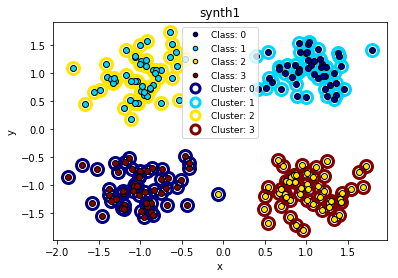

Figure 1: Scatter plot of the Synth1 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.


In [2]:
##Answer to question 4.1.1a
%matplotlib inline
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from Toolbox.clusterPlot import clusterPlot
import matplotlib.pyplot as plt

synth1 = loadmat('Data/synth1.mat')

pred1 = KMeans(n_clusters=4).fit_predict(synth1['X'])

clusterPlot(synth1['X'],pred1,y=synth1['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('synth1')
plt.show()

print('Figure 1: Scatter plot of the Synth1 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.')



> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

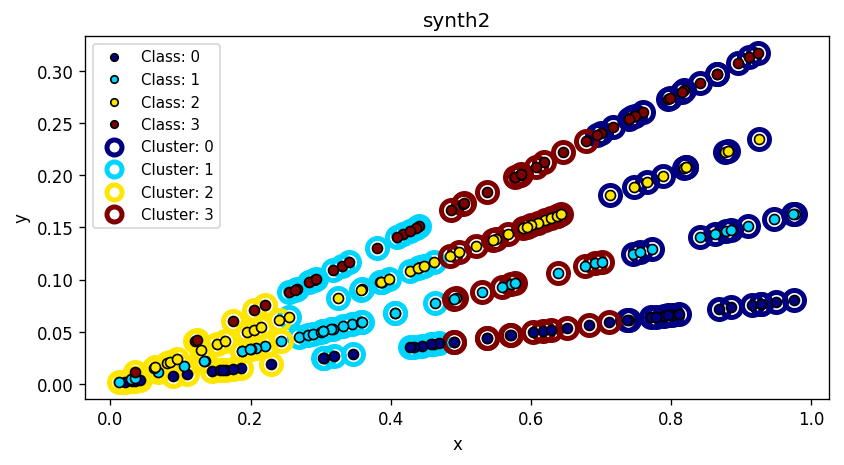

Figure 2: Scatter plot of the Synth2 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.


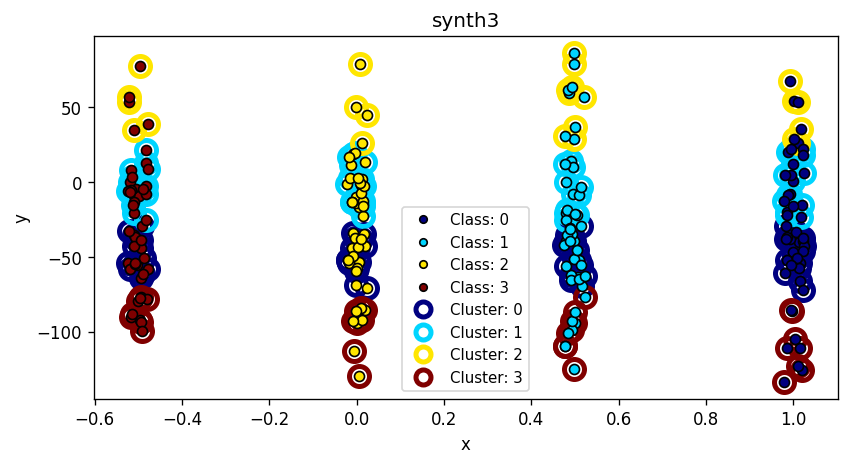

Figure 3: Scatter plot of the Synth3 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.


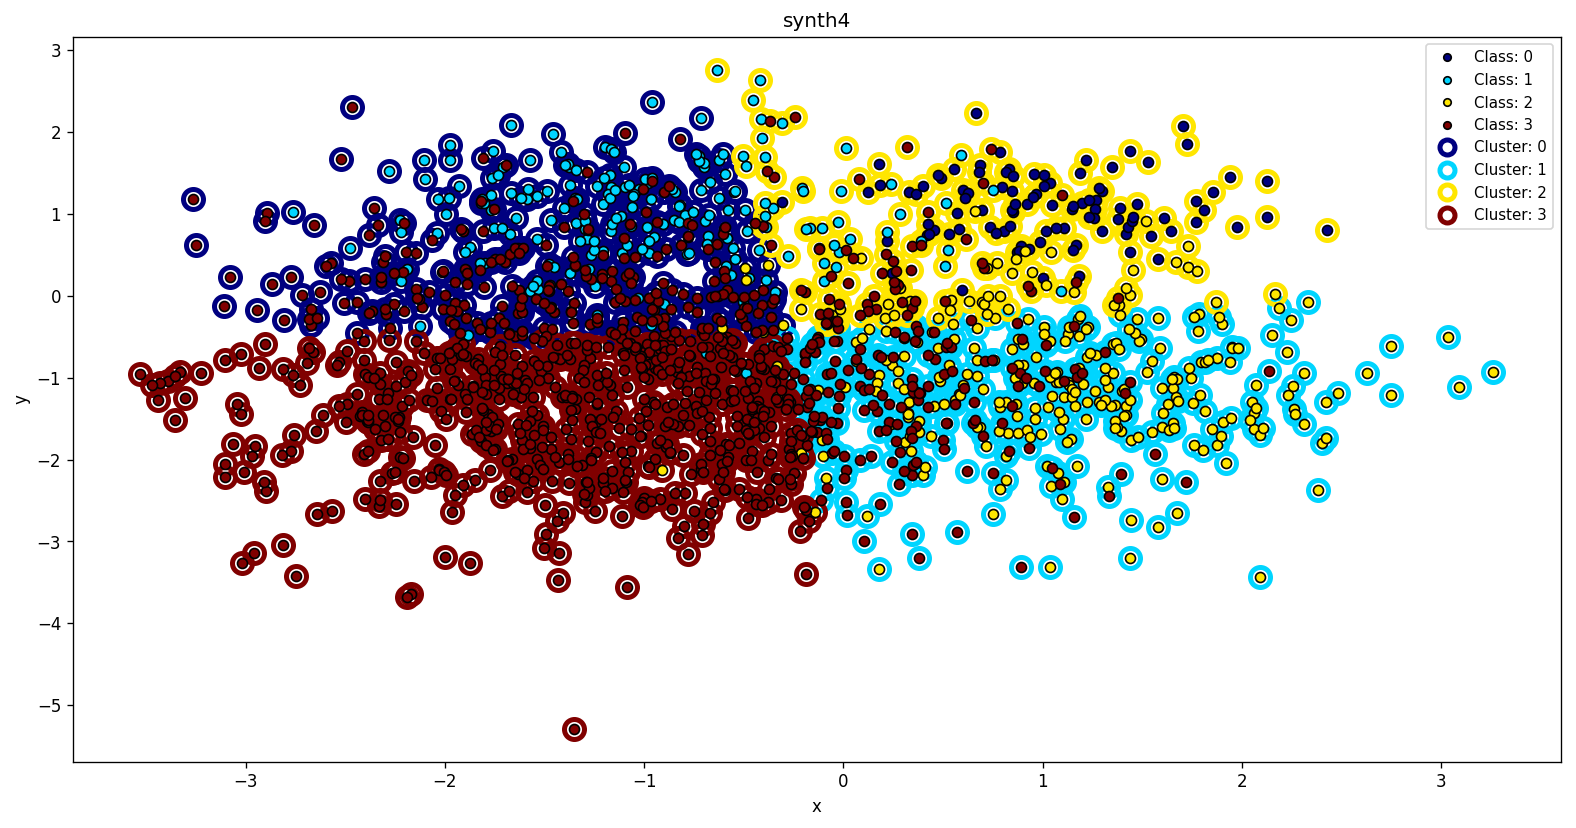

Figure 4: Scatter plot of the Synth4 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.


In [10]:
##Answer to question 4.1.1b

#Synth2
synth2 = loadmat('Data/synth2.mat')

pred2 = KMeans(n_clusters=4).fit_predict(synth2['X'])
fig2 = plt.figure(2, figsize=(8,4), dpi=120)


clusterPlot(synth2['X'],pred2,y=synth2['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('synth2')
plt.show()

print('Figure 2: Scatter plot of the Synth2 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.')


#Synth3
synth3 = loadmat('Data/synth3.mat')

pred3 = KMeans(n_clusters=4).fit_predict(synth3['X'])
fig3 = plt.figure(3, figsize=(8,4), dpi=120)


clusterPlot(synth3['X'],pred3,y=synth3['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('synth3')
plt.show()

print('Figure 3: Scatter plot of the Synth3 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.')


#Synth4
synth4 = loadmat('Data/synth4.mat')

pred4 = KMeans(n_clusters=4).fit_predict(synth4['X'])

fig4 = plt.figure(4, figsize=(16,8), dpi=120)
clusterPlot(synth4['X'],pred4,y=synth4['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('synth4')
plt.show()

print('Figure 4: Scatter plot of the Synth4 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.')



*Double click to type your answer for 4.1.1b here:*

----

It should first be noted that classes can correspond to the underlying labels, but that cluster 1 might be indicative of class 0. Regarding the success of k-means on each dataset:
synth1: k-means performs decently. One or two points are incorrectly clustered.

synth2-3: The linear relation is not recognized by the k-means algorithm, it will just look at the distance measure (euclidean). In the case of synth 3 there is a large difference in scale between the X and Y axis, this hampers correct classification.

sytnh4: There are no visual discernible clusters due to the large overlap, k-means does not work properly.

Award 0.5 points for correct plots.
Award 0.5 points for an adequate explanation.

----

Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

Figure 5: The Entropy, Purity, Rand and Jaccard measures for the Synth1dataset. The Entropy measure is given in blue, the Purity measure in orange, the Rand measure in green and the Jaccard measure in red. The measures are calculated for clusterings acquired using k-means with k values ranging from 1 to 10.


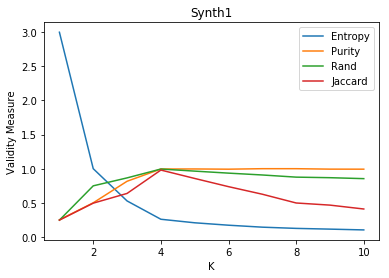

Figure 6: The Entropy, Purity, Rand and Jaccard measures for the Synth2dataset. The Entropy measure is given in blue, the Purity measure in orange, the Rand measure in green and the Jaccard measure in red. The measures are calculated for clusterings acquired using k-means with k values ranging from 1 to 10.


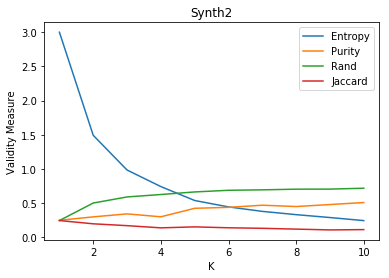

Figure 7: The Entropy, Purity, Rand and Jaccard measures for the Synth3dataset. The Entropy measure is given in blue, the Purity measure in orange, the Rand measure in green and the Jaccard measure in red. The measures are calculated for clusterings acquired using k-means with k values ranging from 1 to 10.


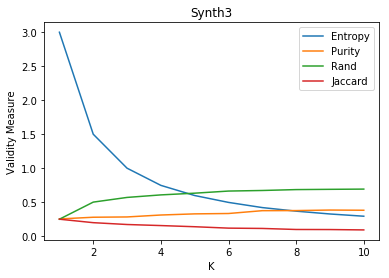

Figure 8: The Entropy, Purity, Rand and Jaccard measures for the Synth4dataset. The Entropy measure is given in blue, the Purity measure in orange, the Rand measure in green and the Jaccard measure in red. The measures are calculated for clusterings acquired using k-means with k values ranging from 1 to 10.


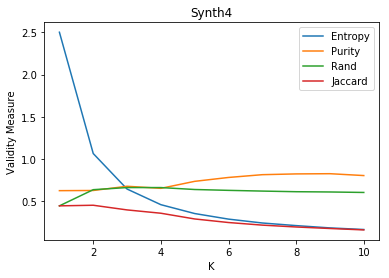

In [4]:
##Answer to question 4.1.2a

from Toolbox.clusterVal import clusterVal

datasets = [synth1, synth2, synth3, synth4]
titles = ['Synth1', 'Synth2', 'Synth3', 'Synth4']
figurenumbers = ['5', '6', '7', '8']

Entropy = np.zeros((4,10))
Purity = np.zeros((4,10))
Rand = np.zeros((4,10))
Jaccard = np.zeros((4,10))


for i in range(0,4):
    for j in range(0,10):
        
        pred = KMeans(n_clusters=j+1).fit_predict(datasets[i]['X'])
        
        [Entropy[i,j], Purity[i,j], Rand[i,j], Jaccard[i,j]] = clusterVal(datasets[i]['y'],pred)

    plt.plot(range(1,11), Entropy[i,:], label='Entropy')
    plt.plot(range(1,11), Purity[i,:], label='Purity')
    plt.plot(range(1,11), Rand[i,:], label='Rand')
    plt.plot(range(1,11), Jaccard[i,:], label='Jaccard')
    plt.xlabel('K')
    plt.ylabel('Validity Measure')
    plt.title(titles[i])
    plt.legend()
    print('Figure ' + figurenumbers[i] + ': The Entropy, Purity, Rand and Jaccard measures for the ' + str(titles[i]) + 'dataset. The Entropy measure is given in blue, the Purity measure in orange, the Rand measure in green and the Jaccard measure in red. The measures are calculated for clusterings acquired using k-means with k values ranging from 1 to 10.')
    plt.show()
        

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

**Answer**

----
(1 point)Using cluster validity we can search for an optimum in the number of clusters. We want to find a low value for the Entropy and a large value of the Purity, Rand and Jaccard. In this case, only for the first dataset can we truly find such an optimum, as it is the only one with clearly defined clusters. Indeed, we find the optimum at k=4, as is expected. 

(bonus info)If one truly wants to find an optimum, you should use cross-validation to ensure you are not overfitting.

----

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command imshow(np.reshape(X[k,:],(c,x,y)).T) which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


In [4]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    ----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be an
        array or a PIL image. If `X` is an array, it
        can have the following shapes and types:
    
        - MxN -- values to be mapped (float or int)
        - MxNx3 -- RGB (float or uint8)
        - MxNx4 -- RGBA (float or uint8)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0. MxN arrays are mapped
        to colors based on the `norm` (mapping scalar to scalar)
        and the `cmap` (mapping the normed scalar to a color).
    
    cm

Figure 9: Visualization of three random faces from the wildfaces database(left). The faces were clustered with k-means using k=10, and the centroids corresponding to the randomly selected faces were plotted (right)


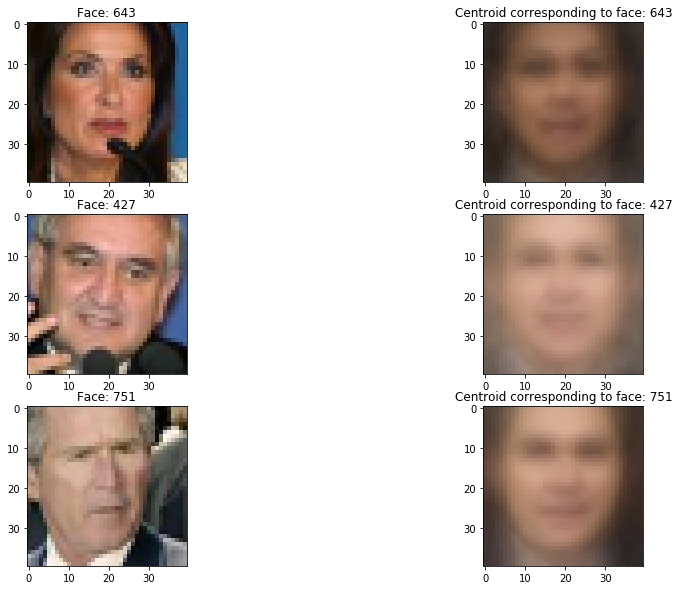

In [19]:
##Answer to question 4.1.3a

facesdict = loadmat('Data/wildfaces.mat')

X = facesdict['X']

kmeans = KMeans(n_clusters=10).fit(X)

ci = kmeans.predict(X)

centroids = kmeans.cluster_centers_


fig, axs = plt.subplots(3,2, figsize=(15,10))
axs = axs.ravel()

for i in range(0,3):
    r = np.random.randint(0,1000)
    axs[2*i].imshow(np.reshape(X[r,:],(3,40,40)).T)
    axs[2*i].set_title('Face: ' + str(r))
    axs[2*i+1].imshow(np.reshape(centroids[ci[r]],(3,40,40)).T)
    axs[2*i+1].set_title('Centroid corresponding to face: ' + str(r))
plt.show()    
print('Figure 9: Visualization of three random faces from the wildfaces database(left). The faces were clustered with k-means using k=10, and the centroids corresponding to the randomly selected faces were plotted (right)')

> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

In [ ]:
##Answer to question 4.1.3b
#Students might insert code here changing the number of clusters (no points are awarded for code)

**Answer**

-----
(0.5points)The data is not especially well represented by their centroids. You can discern general features, skin color, and head shape, any details remain obscured. 
(Note) Some centroids might be extremely representative, as they might represent outliers (and thus be based on 1-2 faces)

(0.5points) When we decrease the number of clusters the faces will become more generic. When we increase the number of clusters, the centroids will become more detailed, and better explain their corresponding faces. This is of course indicative of compression.

-----



> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter cmap=cm.binary to the function imshow().

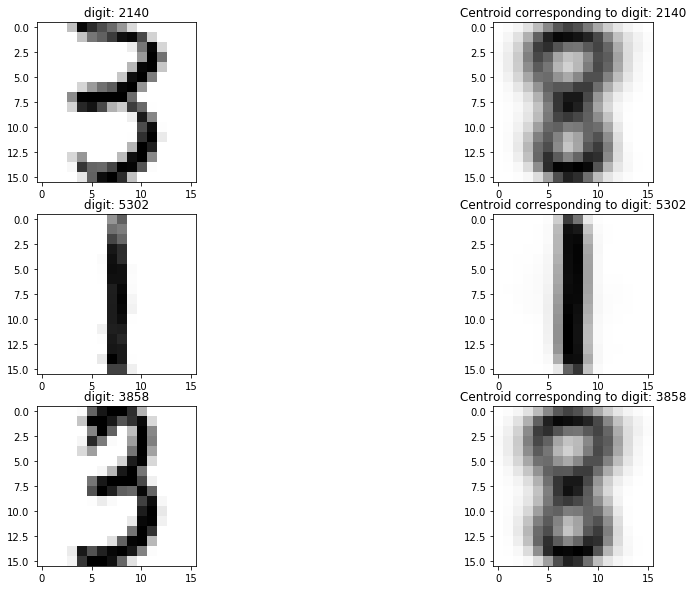

Figure 10: Visualization of three random digits from the MNIST database(left). The digits were clustered with k-means using k=10, and the centroids corresponding to the randomly selected digits were plotted (right)


In [20]:
##Answer to question 4.1.4a

import matplotlib.cm as cm


facesdict = loadmat('Data/digits.mat')

X = facesdict['X']

kmeans = KMeans(n_clusters=10).fit(X)

ci = kmeans.predict(X)

centroids = kmeans.cluster_centers_


fig, axs = plt.subplots(3,2, figsize=(15,10))
axs = axs.ravel()

for i in range(0,3):
    r = np.random.randint(0,9298)
    axs[2*i].imshow(np.reshape(X[r,:],(16,16)), cmap=cm.binary)
    axs[2*i].set_title('digit: ' + str(r))
    axs[2*i+1].imshow(np.reshape(centroids[ci[r]],(16,16)), cmap=cm.binary)
    axs[2*i+1].set_title('Centroid corresponding to digit: ' + str(r))
    
plt.show()    
print('Figure 10: Visualization of three random digits from the MNIST database(left). The digits were clustered with k-means using k=10, and the centroids corresponding to the randomly selected digits were plotted (right)')

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

In [21]:
##Answer to question 4.1.4b
#Students might vary the number of clusters to determine how many they need for a decent representation of all numbers. (no points are awarded for this)

**Answer**

---
(0.75points) Several digits might be close together in a multidimensional space, there might even be overlap between digits. This causes the k-means algorithm to sometimes misclassify. It might be that you find that 5, 6 and 8 are represented by the same cluster, while the number 2 is represented by 3 different clusters, simply because the intercluster distance is smaller than the intracluster distance.

(0.25points) There is no clear value for k which perfectly represents all digits. In practice you will find that little errors are made when 40-60 clusters are used, as there is little remaining overlap between digits Key is to realize you will need significantly more clusters than classes when the variance within a class is comparable to the variance between classes.

---

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package *scipy.cluster.hierarchy*. The function *linkage()* forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function *fcluster* extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function *linkage()* computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type *Z = linkage(X, method='single', metric='euclidean')* to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function*fcluster()*. For example, type *cls = fcluster(Z, criterion='maxclust', t=4)* to get a maximum of 4 clusters. Type *help(fcluster)* (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

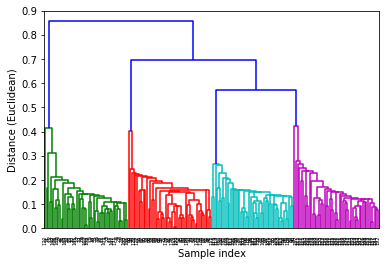

Figure 11: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and single linkage on the Synth1 dataset. Note that the coloring is determined by a distance cutoff between clusters. The cutoff is set to 0.5 to acquire 4 clusters.


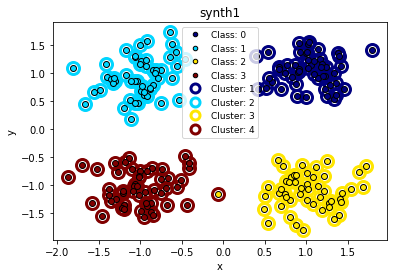

Figure 12: Scatter plot of the Synth1 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.


In [31]:
##Answer to question 4.2.1a
import scipy.cluster.hierarchy as hc

Z = hc.linkage(synth1['X'],method='single', metric='euclidean')

cls = hc.fcluster(Z, criterion='maxclust',t=4)

R = hc.dendrogram(Z, color_threshold=0.5)
plt.ylabel('Distance (Euclidean)')
plt.xlabel('Sample index')
plt.show()
print('Figure 11: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and single linkage on the Synth1 dataset. Note that the coloring is determined by a distance cutoff between clusters. The cutoff is set to 0.5 to acquire 4 clusters.')


clusterPlot(synth1['X'],cls,y=synth1['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('synth1')
plt.show()

print('Figure 12: Scatter plot of the Synth1 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.')


> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

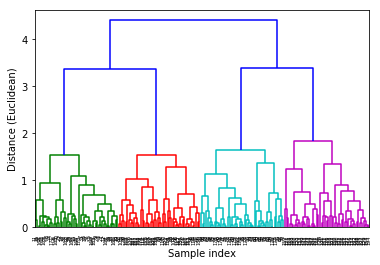

Figure 13: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and complete linkage on the Synth1 dataset. Note that the coloring is determined by a distance cutoff between clusters. The cutoff is set to 2.5 to acquire 4 clusters.


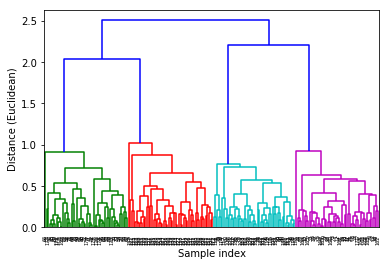

Figure 14: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and average linkage on the Synth1 dataset. Note that the coloring is determined by a distance cutoff between clusters. The cutoff is set to 1.75 to acquire 4 clusters.


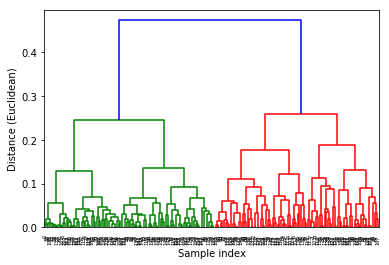

Figure 15: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and average linkage on the Synth2 dataset. Note that the coloring is determined by a distance cutoff between clusters. The cutoff is set to 0.5 to acquire 4 clusters.


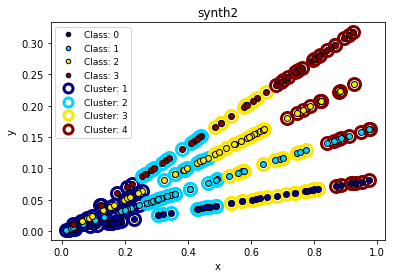

Figure 16: Scatter plot of the Synth2 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.


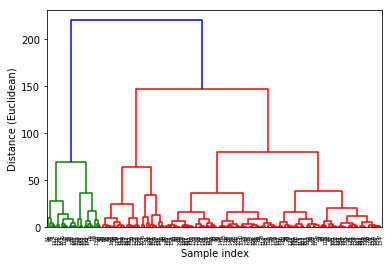

Figure 17: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and average linkage on the Synth3 dataset. Note that the coloring is determined by a distance cutoff between clusters.


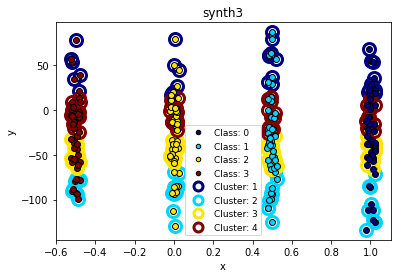

Figure 18: Scatter plot of the Synth3 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.


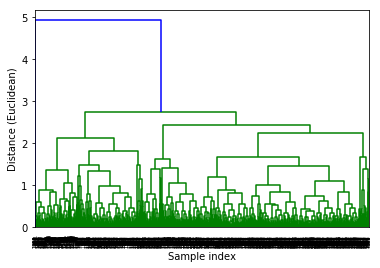

Figure 19: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and average linkage on the Synth4 dataset. Note that the coloring is determined by a distance cutoff between clusters.


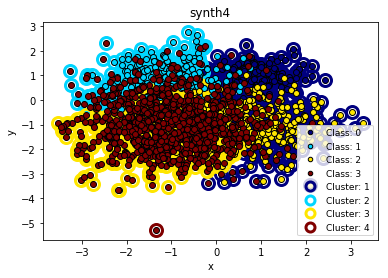

Figure 20: Scatter plot of the Synth4 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.


In [45]:
##Answer to question 4.2.1b
#Complete
Z = hc.linkage(synth1['X'],method='complete', metric='euclidean')

cls = hc.fcluster(Z, criterion='maxclust',t=4)

R = hc.dendrogram(Z, color_threshold=2.5)
plt.ylabel('Distance (Euclidean)')
plt.xlabel('Sample index')
plt.show()
print('Figure 13: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and complete linkage on the Synth1 dataset. Note that the coloring is determined by a distance cutoff between clusters. The cutoff is set to 2.5 to acquire 4 clusters.')


#Average
Z = hc.linkage(synth1['X'],method='average', metric='euclidean')

cls = hc.fcluster(Z, criterion='maxclust',t=4)

R = hc.dendrogram(Z, color_threshold=1.75)
plt.ylabel('Distance (Euclidean)')
plt.xlabel('Sample index')
plt.show()
print('Figure 14: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and average linkage on the Synth1 dataset. Note that the coloring is determined by a distance cutoff between clusters. The cutoff is set to 1.75 to acquire 4 clusters.')


#Synth2
Z = hc.linkage(synth2['X'],method='average', metric='euclidean')

cls = hc.fcluster(Z, criterion='maxclust',t=4)

R = hc.dendrogram(Z)
plt.ylabel('Distance (Euclidean)')
plt.xlabel('Sample index')
plt.show()
print('Figure 15: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and average linkage on the Synth2 dataset. Note that the coloring is determined by a distance cutoff between clusters. The cutoff is set to 0.5 to acquire 4 clusters.')


clusterPlot(synth2['X'],cls,y=synth2['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('synth2')
plt.show()

print('Figure 16: Scatter plot of the Synth2 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.')



#Synth3
Z = hc.linkage(synth3['X'],method='complete', metric='euclidean')

cls = hc.fcluster(Z, criterion='maxclust',t=4)

R = hc.dendrogram(Z)
plt.ylabel('Distance (Euclidean)')
plt.xlabel('Sample index')
plt.show()
print('Figure 17: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and average linkage on the Synth3 dataset. Note that the coloring is determined by a distance cutoff between clusters.')


clusterPlot(synth3['X'],cls,y=synth3['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('synth3')
plt.show()

print('Figure 18: Scatter plot of the Synth3 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.')


#Synth4
Z = hc.linkage(synth4['X'],method='average', metric='euclidean')

cls = hc.fcluster(Z, criterion='maxclust',t=4)

R = hc.dendrogram(Z)
plt.ylabel('Distance (Euclidean)')
plt.xlabel('Sample index')
plt.show()
print('Figure 19: Dendrogram resulting from performing hierarchical clustering using the Euclidean distance and average linkage on the Synth4 dataset. Note that the coloring is determined by a distance cutoff between clusters.')


clusterPlot(synth4['X'],cls,y=synth4['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('synth4')
plt.show()

print('Figure 20: Scatter plot of the Synth4 data set. The inner circles indicate the underlying ground truth. The outer circles indicate the assigned clusters. Note that these do not have to directly correspond 1 to 1.')


**Answer**

----
(0.25)The Dendrograms clearly change in structure. The biggest difference is between single linkage and the other groups. Of course single linkage always looks to the closest point to determine the next part of a cluster. After clusters become larger and larger, this becomes more influential, while complete, and to an even larger extent, average, are more robust to these changes. For the trivial problem of the Synth1 dataset, it doesn't matter much which method we choose.

(0.25)Most of the problems we encountered when using k-means are also encountered when applying hierarchical clustering to the new datasets. 
For synth2, the left part, where points are really close, generally causes large clusters spanning most of the data. This could be solved by acquiring more samples. It doesn't matter a lot which linkage method is used. (although distance, such as correlation, might improve a lot!
For synth3, we encounter the same scaling problem, and we find horizontal, instead of vertical clusters.
Synth4 is near unsolvable using clustering methods, as there are no well-defined clusters. We therefore observe similar results.

----

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.